# Ladybird Analysis

# Compare the mean sizes of low and high predated two-spot ladybird populations

<div class="alert alert-success">

# Part 1: Exploring your data
</div>

## Task 1.2: Read in and print the low and high predation samples to check the data are okay

Using pandas, read in your excel spreadsheet and call it something sensible.

1. To read in excel spreadsheets we use the command `pd.read_excel('filename.xlsx')`. Do this now, calling the DataFrame something sensible, such as `ladybirds`.

2. Print the data to make sure it is okay. You should see two columns headed `low` and `high`. You will probably see `NaN` repeated at the bottom of one of the columns. This isn't a problem; it's just because different numbers of ladybirds were measured in the two cemeteries.

In [1]:
# read and print your ladybird size dataset
import pandas as pd

ladybirds = pd.read_excel('ladybird_sizes_demo.xlsx')

ladybirds

,low,high
0,3.5,4.5
1,4.0,6.0
2,4.0,6.0
3,5.0,6.5
4,4.0,6.0
...,...,...
60,4.8,NaN
61,5.3,NaN
62,5.0,NaN
63,4.5,NaN


## Task 1.3: Plot the samples in a histogram to see how they are distributed

Plot the distributions of the low and high predation samples as histograms in a single annotated graph. 

See [2.7 - Visualising data](../Self-study%20Notebooks/2.7%20-%20Visualising%20data.ipynb) for help.

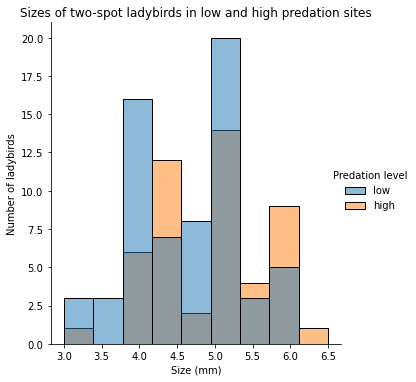

In [3]:
# annotated histograms of samples of two-spot ladybird sizes from low and high predation cemeteries

import seaborn as sns

g = sns.displot(ladybirds)
g.ax.set_xlabel('Size (mm)')
g.ax.set_ylabel('Number of ladybirds')
g.ax.set_title('Sizes of two-spot ladybirds in low and high predation sites')
g.legend.set_title('Predation level');

## Task 1.4: The distributions might be clearer in a boxplot

Your `low` and `high` histograms will probably overlap quite a lot. This makes it hard to see if the means of the two samples are different.

If that is the case, a boxplot is probably a better way to visualise your data as it hides individual data points and instead uses a 5-number-summary to summarise the distribution of your samples. 

Plot the distributions of the low and high predation samples in an annotated boxplot. 

See [4.5 - Visual comparison](../Self-study%20Notebooks/4.5%20-%20Visual%20comparison.ipynb) for help.

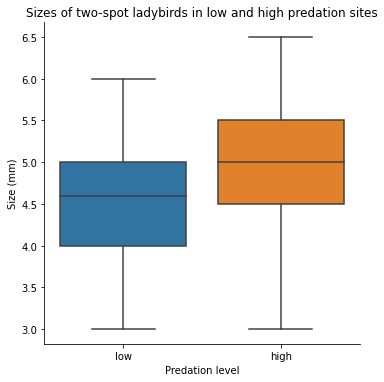

In [4]:
# a boxplot to visually compare ladybird sizes from low and high predation cemeteries 

g = sns.catplot(data=ladybirds, kind='box')
g.ax.set_ylabel('Size (mm)')
g.ax.set_xlabel('Predation level')
g.ax.set_title('Sizes of two-spot ladybirds in low and high predation sites');

## Task 1.5: What does the box and the various lines in a boxplot represent?

If you don't know try googling the answer. Write your answer in the following markdown cell.

> The boxes represent the middle 50% of data. Also called the inter-quartile range. The horizontal line in the box is the median value. Half the data lie above it and half below it. The whiskers represent most of the rest of the data. Their lengths are 1.5 times the inter-quartile range.

## Task 1.6: Eye-ball estimates of the means and standard deviations

It is generally a good idea to estimate means and standard deviations by eye before calculating them on a computer. This is so you can check your eye-ball estimates with the actual values output by Python. If they don't match then you know something is wrong: either your estimates or your code.

Using your histograms or boxplots, estimate the means and standard deviations of ladybird sizes from both cemeteries. Remember that a rough estimate of the standard deviation is given by this formula

$$s \approx \frac{\mathrm{max\ value} - \mathrm{min\ value}}{6}$$


> low: xbar = 4.5 mm, s = 0.5 mm

> high: xbar = 5 mm, s = 0.6 mm

## Task 1.7: Calculate the sample sizes, means and standard deviations

Now, using Python code, calculate the sample sizes, means and standard deviations of the two samples and print to the appropriate number of decimal places.

See Notebook [4.2 - Comparing two population means](../Self-study%20Notebooks/4.2%20-%20Comparing%20two%20population%20means.ipynb#Sample-means-and-standard-deviations) for example code.

How do they compare to your eye-ball estimates?

In [5]:
# sample sizes, sample means and sample standard deviations of both samples

n = ladybirds.count()
xbar = ladybirds.mean()
s = ladybirds.std()

print('Sample sizes, n')
print(n)
print() # Blank line

print('Sample means to 2dp, xbar')
print(round(xbar, 2))
print() # Blank line

print('Sample standard deviations to 2dp, s')
print(round(s, 2))

Sample sizes, n
low     65
high    49
dtype: int64

Sample means to 2dp, xbar
low     4.62
high    4.97
dtype: float64

Sample standard deviations to 2dp, s
low     0.74
high    0.74
dtype: float64


## Task 1.8: Calculate the *d*-statistic: the difference in sample means

Using the sample means you just calculated, calculate, using Python code, the difference in sample means. We will call this the *d*-statistic. 

See Notebook [4.2 - Comparing two population means](../Self-study%20Notebooks/4.2%20-%20Comparing%20two%20population%20means.ipynb#The-test-statistic) for the code to do this.

In [6]:
# calculate your observed d-statistic: difference in sample means

d = xbar['high'] - xbar['low']

print(f'difference in observed beak depths = {d:.2f} mm')

difference in observed beak depths = 0.35 mm


## Task 1.9: Take a guess on whether the population means are the same or different?

Based on the plots and your calculated means, take a guess on whether mean ladybird sizes of the two **populations**, from which your two samples are drawn, are the same, or are different, or can't you tell (is there too much overlap of the two distributions)?

Write your answer below and give a reason for your answer.

> Although there is a difference in the sample means, there is a lot of overlap between ladybird sizes in the two sites. Therefore, it's not clear if there is a significant difference in the population means.

## Task 1.10: Is the mean of the high predation sample *smaller* than the mean of the low predation sample?

Our prediction is that two-spot ladybirds in the high predation cemetery will have a *larger* mean size than ladybirds in the low predation cemetery. Is that the case in your data?

If the opposite is true then your data do not support our biological hypothesis that Harlequin ladybirds prefer to predate on small two-spot ladybirds. List three potential reasons why your data show the opposite to our prediction.

> The mean of the high predation cemetery is higher than the mean of the low predation cemetery. This is in accordance with our prediction.

<div class="alert alert-success">


# Part 2: How likely is the observed difference in your sample means (the *d*-statistic) if the null hypothesis were true? The *p*-value.
</div>

Having looked at your data and calculated the difference in the sample means, you next need to work out how likely that difference is assuming the null hypothesis were true.

If that difference is **likely** under the null hypothesis then you have insufficient evidence to reject the null hypothesis and, therefore, insufficient evidence to conclude that Harlequin ladybirds prefer to eat small two-spot ladybirds.

On the other hand, if that difference is **unlikely** under the null hypothesis then you have sufficient evidence to reject the null hypothesis. In addition, if the mean ladybird size of your high predation sample is greater than the mean ladybird size of your low predation sample, then you have sufficient evidence to conclude that Harlequin ladybirds prefer to eat small two-spot ladybirds.

How likely the observed difference in sample means is under the null hypothesis is called a *p*-value. 

This is what you are going to calculate now.

## Task 2.1: Construct a statistical model of the null hypothesis

To calculate a *p*-value you first need to construct a **statistical model of the null hypothesis**. What this actually means is you will assume that ladybird sizes in the low and high predation populations have identical distributions. (See Notebook [4.2 - Comparing two population means](../Self-study%20Notebooks/4.2%20-%20Comparing%20two%20population%20means.ipynb#Create-a-statistical-model-of-the-sampling-process-assuming-the-null-hypothesis-were-true) for an explanation of a statistical model.)

In your model, first let's assume that ladybird sizes are normally distributed. This is a reasonable assumption as sizes of most things in the natural world are normally distributed.

Second, **you have to decide** what the mean ($\mu$) and standard deviation ($\sigma$) of this normal distribution will be. You should pick values that are close to the means and standard deviations of your samples. For example, you might set $\mu$ equal to the average of your two sample means and $\sigma$ to the average of your two sample standard deviations. The actual values you pick will not matter too much so don't spend too long on choosing values.

---

In the markdown cell below, state the mean ($\mu$) and standard deviation ($\sigma$) of the normal distribution of your statistical model.

> We'll use the average values of the sample means and standard deviations for our mean and standard deviation of our statistical model.

> mu = 4.8 mm

> sigma = 0.74 mm

## Task 2.2: Simulate a pair of samples from the low and high predation populations under the null hypothesis and calculate the *d*-statistic

You are now going to simulate the statistical model of the null hypothesis. To start with you will do this for a single pair of samples. This is to make sure your code is working correctly before doing the full simulation. One sample is simulated from the low predation population and the other sample from the high predation population. Even though we are assuming both populations have the same distribution, the simulated samples will be different due to the randomness of sampling. You will calculate the means of these two simulated samples and then calculate the difference in these means, i.e., you will calculate a simulated *d*-statistic. 

---

Follow these steps to perform a single simulation of the statistical model of the null hypothesis: 
1. Write code to simulate randomly drawing a pair of samples, one each from the low and high predation populations. Remember, the sample sizes (i.e., the number of ladybirds measured) of these simulated samples must match those of your actual samples from the cemeteries. 
2. Print out the simulated ladybird sizes from both simulated samples.
3. Calculate and print the mean ladybird sizes of both simulated samples.
4. Calculate and print the *d*-statistic of this pair of simulated samples.

You might find it helpful to copy, paste and adapt the code from Notebook [4.2 - Comparing two population means](../Self-study%20Notebooks/4.2%20-%20Comparing%20two%20population%20means.ipynb#simpair).

<div class="alert alert-info">

Run the code several times to convince yourself that each time you run it you get different random samples with different sample means, resulting in different *d*-statistics.
</div>

In [7]:
# using your statistical model, simulate a pair of random samples from the low and high predation populations assuming the null hypothesis were true and calculate the d-statistic

from numpy.random import normal

# Sample sizes from low and high. Use the observed sample sizes to avoid hard-coding them.
n = ladybirds.count()
n_low = n['low']
n_high = n['high']

# Set the populations' parameters. As we are assuming that the null model is true, both populations have identical parameters.
mu = 4.8
sigma = 0.74

# Sample ladybirds from low and store them in a list called sample_low
sample_low = normal(mu, sigma, n_low)
# Sample ladybirds from high and store them in a list called sample_high
sample_high = normal(mu, sigma, n_high)

# Print samples
print(sample_low)
print(sample_high)
print()

# Calculate sample means
xbar_low = sample_low.mean()
xbar_high = sample_high.mean()

# Print sample means to 2dp
print(f'sample mean ladybird size from low predation site  = {xbar_low:.2f} mm')
print(f'sample mean ladybird size from high predation site = {xbar_high:.2f} mm')

# Calculate and print the d-statistic
d = xbar_high - xbar_low

print() # blank line
print(f'difference in sample mean ladybird sizes, d-statistic = {xbar_high:.2f} - {xbar_low:.2f} = {d:.2f}')

[4.29879029 5.43674805 4.8710111  2.84116077 5.41771372 3.73959491
 4.20390863 5.77413132 4.03494613 4.26845443 5.14936331 3.33793618
 4.40936186 5.36438969 5.35574203 4.99262828 6.46801758 5.89112527
 3.62047577 4.55945114 5.02323197 4.0526977  4.2994294  6.08472957
 4.01835331 4.59395322 4.494912   4.52417908 5.45596418 4.48818195
 3.68527094 4.16945575 5.21702062 4.55827707 4.7633662  5.0786582
 3.25258671 5.4499226  5.43284462 4.70356497 4.05256578 5.41616446
 6.04042889 5.20853402 4.12013485 4.46306061 4.56399931 5.2117933
 5.2852415  4.4768754  4.5074261  4.2951918  4.21957452 4.86133587
 2.99368385 5.66723029 4.06030932 5.24107751 4.20977875 4.34704539
 4.12316357 4.87706945 2.88370764 5.03809925 4.17966884]
[5.14714578 5.81477434 4.09982696 4.25958632 6.13377746 5.376762
 4.19692117 4.7353634  4.43787165 6.28009556 5.25724825 4.38984535
 4.51743386 5.0120582  2.63438248 5.18682794 4.8336181  5.39924795
 4.17413974 4.63182989 5.46255161 4.54295672 6.03023809 5.548971
 4.40580334

## Task 2.3: Construct the sampling distribution of the *d*-statistic

Now construct and plot the sampling distribution of the *d*-statistic under the null hypothesis. Do this by simulating thousands of pairs of samples and calculating the *d*-statistic for each.

To construct and plot the sampling distribution, it may be helpful to copy, paste and adapt the code from [4.2 - Comparing two population means](../Self-study%20Notebooks/4.2%20-%20Comparing%20two%20population%20means.ipynb#samplingdist).

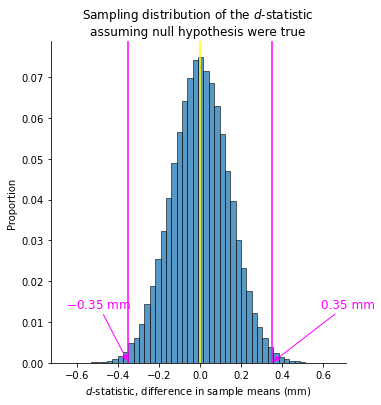

In [9]:
# construct and plot the sampling distribution of the d-statistic

import seaborn as sns
from numpy.random import normal

# Store the observed difference in sample mean beak depths in d_obs to avoid hard-coding data in the histogram
xbar = ladybirds.mean()
d_obs = xbar['high'] - xbar['low']

# Sample sizes from low and high
n = ladybirds.count()
n_low = n['low']
n_high = n['high']

# Set the populations's parameters. As we are assuming that the null model were true, both populations have identical parameters.
mu = 5.8
sigma = 0.74

# Set the number of samples to 100,000.
number_of_samples = 100000

# 100,000 random samples of ladybird sizes from the low population
samples_low = normal(mu, sigma, (n_low, number_of_samples))
# 100,000 random samples of ladybird sizes from the high population
samples_high = normal(mu, sigma, (n_high, number_of_samples))

# Calculate all sample means
xbars_low = samples_low.mean(axis=0)
xbars_high = samples_high.mean(axis=0)

# Calculate the d-statistic for each pair of samples
ds = xbars_high - xbars_low

# Sampling distribution of the d-statistic
g = sns.displot(ds, bins=50, stat='proportion')

# Add some annotation
g.ax.set_title('Sampling distribution of the $d$-statistic\nassuming null hypothesis were true')
g.ax.set_xlabel('$d$-statistic, difference in sample means (mm)')
g.ax.axvline(0, color='yellow') # Add a yellow vertical line at d=0
g.ax.axvline(d_obs, color='magenta') # Add a magenta vertical line at the observed value of d=d_obs
g.ax.axvline(-d_obs, color='magenta') # Add a magenta vertical line at the observed value of d=-d_obs
g.ax.annotate(f'{d_obs:.2f} mm', (d_obs, 0), (270, 55), color='magenta', textcoords='axes points', fontsize=12, arrowprops={'arrowstyle':'-|>', 'color':'magenta'}); # Add an arrow
g.ax.annotate(f'$-${d_obs:.2f} mm', (-d_obs, 0), (15, 55), color='magenta', textcoords='axes points', fontsize=12, arrowprops={'arrowstyle':'-|>', 'color':'magenta'}); # Add an arrow

## Task 2.4: Is your observed *d*-statistic likely or not under the null hypothesis?

Think about what the sampling distribution of the *d*-statistic means. What it tells you is this. If the null hypothesis were true (i.e., average ladybird sizes are the same in the low and high predation cemeteries) and you kept taking samples from both populations and calculating the difference in their means (the *d*-statistic), the histogram of all those differences would be the sampling distribution you just plotted.

If the null hypothesis were actually true, your observed *d*-statistic (the one you calculated from your data) would lie somewhere in this distribution.

If your observed *d*-statistic lies far into the tail of the sampling distribution, then your *d*-statistic is unlikely if the null hypothesis were true (because that is what we are assuming when we construct the sampling distribution). Which, of course, suggests then that the null hypothesis is not true and you have sufficient evidence to reject it.

On the other hand, if your *d*-statistic lies roughly in the middle of the sampling distribution, then your *d*-statistic is quite likely if the null hypothesis were true. Which means you have insufficient evidence to reject the null hypothesis.

By eye-balling your constructed sampling distribution, do you think your observed *d*-statistic is likely or unlikely under the null hypothesis? 

Write your answer below with a justification.

> The observed difference in sample means (0.35mm)  is far into the tail of the sampling distribution. This suggests that 0.35 is unlikely under the null hypothesis and we probably have sufficient evidence to reject the null hypothesis? 

## Task 2.5: Calculate the *p*-value of your *d*-statistic

You want to put a number (a probability) to how likely your *d*-statistic is if the null hypothesis were true. This is called a *p*-value.

Your *p*-value is the probability of obtaining a *d*-statistic as unusually high as what you observed if the null hypothesis were true. That's a bit of a mouthful. It is the area of the tails of the sampling distribution to the left and right of your *d*-statistic. 

Why do we calculate the area in both tails? Remember that our alternative hypothesis is the logical opposite of our null hypothesis. The alternative hypothesis says that there is a **difference** in the population means. But that difference can be either way: mean ladybird sizes in the low predation cemetery could be **smaller** than mean ladybird sizes in the high predation cemetery **OR** mean ladybird sizes in the low predation cemetery could be **larger** than mean ladybird sizes in the high predation cemetery. So we need to calculate the combined probability of both of these, hence we calculate the area in both tails. 

---

Now calculate the *p*-value of your *d*-statistic. 

To calculate the *p*-value, it may be helpful to copy and paste the code from [4.2 - Comparing two population means](../Self-study%20Notebooks/4.2%20-%20Comparing%20two%20population%20means.ipynb#pvalue).

In [10]:
# calculate and print the p-value of your observed d-statistic under the null hypothesis

# Set a tally for the number of times the absolute value of the d-statistic is at least 0.35 mm
count = 0

# Loop through all simulated values of d
for d in ds:
    
    # Increment tally if d is greater than 0.35 mm or less than -0.35 mm
    if d < -d_obs or d > d_obs:
        count += 1
        
# Calculate the p-value 
# (the number of samples in which the difference is at least 0.35 divided by the total number of samples)
p_value = count / len(ds)

# Print the p-value
print(f'p-value = {p_value:.3f}')

p-value = 0.013


<div class="alert alert-success">

# Part 3: Two-sample *t*-test in practice
</div>

## Task 3.1: Perform a two-sample *t*-test

The *d*-statistic is the simplest, and most intuitive, measure of the difference between mean ladybird sizes in the low and high predation cemeteries. This is why we have taken you through the process of simulating its sampling distribution to calculate a *p*-value. However, from a practical point-of-view the *d*-statistic is not that useful. Instead we use the *t*-statistic.

The great thing about using the *t*-statistic is that we do not need to do any simulations to construct its sampling distribution to calculate a *p*-value. As we saw in the Self-study Notebooks, the sampling distribution of the *t*-statistic is already known; it has a mathematical formula that we can directly plug our data into to get a *p*-value. This means we can use statistical software to perform the statistical test for us and not have to go through the laborious process of coding it ourselves. 

---

Now perform a two-sample *t*-test on your data using Python code. To do this, copy, paste and adapt the code from [4.4 - Two sample *t*-test in practice](../Self-study%20Notebooks/4.4%20-%20Two%20sample%20t-test%20in%20practice.ipynb).

In [12]:
# perform a two-sample t-test on your data

from scipy.stats import ttest_ind # import the two sample t-test function

# Perform the two sample t-test
t, p = ttest_ind(ladybirds['high'], ladybirds['low'], nan_policy='omit')

# Print the t-statistic to 2dp
print(f't-statistic = {t:.2f}')

# Print the p-value to 4dp
print(f'p-value = {p:.3f}')

t-statistic = 2.49
p-value = 0.014


## Task 3.2: Reject or not reject your null hypothesis

At this point we could leave it there: We've stated our hypotheses, collected and analysed the data and calculated how likely our data are under the null hypothesis (i.e., the *p*-value). You could then leave it to other scientists to judge if your data support your biological hypothesis. 

But scientists, like everyone else, like clear-cut answers: Do your data support your hypothesis or not?

Unfortunately there are rarely such clear-cut answers. But scientists have created an illusion of such. 

To create this illusion, we set a threshold value on our *p*-values. This threshold is a convention (i.e., has no scientific basis) and in the Biological and Medical sciences this threshold is 0.05. It even has a fancy name: **the 95% confidence level**, and given the fancy Greek letter $\alpha$. This is how the illusion of a clear-cut answer works:

If our *p*-value is below 0.05 then we **reject the null hypothesis**. And we say "There is a **statistically significant** difference between mean ladybird sizes in low and high predation cemeteries."

If our *p*-value is above 0.05 then we **fail to reject the null hypothesis**. And we say "There is a **no statistically significant difference** between mean ladybird sizes in low and high predation cemeteries."

What happens if your *p*-value is say 0.051? You've just missed the threshold. All that hard work collecting data and you end up with a boring, non-significant result that is unpublishable. This, of course, leads to scientists trying to find ways to make their *p*-values go below 0.05. This is quite easy to do: remove some data points, use other statistical tests, or even make data up (this does happen, although rarely). Much has been written lately in the scientific literature about why *p*-values promote poor scientific practices.

However, all the scientific literature you will read in your studies, and in your later careers, will contain statistical analyses with *p*-values. This is why you need to understand how they are calculated and what they mean.

---

Based on your *p*-value and a confidence level of $\alpha=$ 0.05. Do you reject or not reject your null hypothesis that mean ladybird sizes are the same in cemeteries with low and high predation rates? Write your answer below.

Also see [4.4 - Two sample *t*-test in practice](../Self-study%20Notebooks/4.4%20-%20Two%20sample%20t-test%20in%20practice.ipynb#To-reject-or-not-reject-the-null-hypothesis) for more discussion about rejecting or not rejecting a null hypothesis.

> p=0.14 which is less than 0.05. We therefore reject the null hypothesis that the average size of ladybirds are the same in the low and high predation cemeteries.

## Task 3.3: Report the result of your test

Report the outcome of your test in words, as you might write in a report.

See [4.4 - Two sample *t*-test in practice](../Self-study%20Notebooks/4.4%20-%20Two%20sample%20t-test%20in%20practice.ipynb#Reporting-the-result-of-the-test) for an example. 

> Sizes of two-spot ladybirds were measured in two different cemeteries in Edinburgh that experience different levels of Harlequin ladybird predation.  A statistically significant difference was found of 0.35 mm between ladybird sizes of the two cemeteries (*t* = 2.49, *n*<sub>1</sub> = 65, *n*<sub>2</sub> = 49, *p* = 0.014). This evidence supports the hypothesis that the Harlequin ladybirds prefer to predate upon smaller rather than larger two-spot ladybirds.